In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
matches = pd.read_csv('Matches2.csv')

In [28]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0                       ID  950 non-null    int64  
 1   City                    899 non-null    object 
 2   Date                    950 non-null    object 
 3   Season                  950 non-null    object 
 4   MatchNumber             950 non-null    object 
 5   Team1                   950 non-null    object 
 6   Team2                   950 non-null    object 
 7   Venue                   950 non-null    object 
 8   TossWinner              950 non-null    object 
 9   TossDecision            950 non-null    object 
 10  SuperOver               946 non-null    object 
 11  WinningTeam             946 non-null    object 
 12  WonBy                   950 non-null    object 
 13  Margin                  932 non-null    float64
 14  method                  19 non-null     ob

In [47]:
matches["City"].describe()

count     950
unique      2
top         N
freq      936
Name: SuperOver, dtype: object

In [48]:
matches["SuperOver"].value_counts()

SuperOver
N    936
Y     14
Name: count, dtype: int64

In [30]:
print(matches["City"].value_counts())

City
Mumbai            159
Kolkata            79
Delhi              78
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Bengaluru          15
Durban             15
Visakhapatnam      13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Dharamsala          9
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64


In [31]:
matches['City'] = matches['City'].fillna('Dubai')

In [32]:
matches['SuperOver'] = matches['SuperOver'].fillna('N')

In [33]:
matches['WinningTeam'] = matches['WinningTeam'].fillna("None")

In [34]:
matches['Margin'] = matches['Margin'].fillna(0)

In [35]:
matches['method'] = matches['method'].fillna("None")

In [36]:
matches['Player_of_Match'] = matches['Player_of_Match'].fillna("None")

In [37]:
matches['Player_of_Match'] = matches['Player_of_Match'].fillna("None")

In [38]:
matches['Date'] = pd.to_datetime(matches['Date'])

In [39]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0                       ID  950 non-null    int64         
 1   City                    950 non-null    object        
 2   Date                    950 non-null    datetime64[ns]
 3   Season                  950 non-null    object        
 4   MatchNumber             950 non-null    object        
 5   Team1                   950 non-null    object        
 6   Team2                   950 non-null    object        
 7   Venue                   950 non-null    object        
 8   TossWinner              950 non-null    object        
 9   TossDecision            950 non-null    object        
 10  SuperOver               950 non-null    object        
 11  WinningTeam             950 non-null    object        
 12  WonBy                   950 non-null    object    

Q 1. Find top 5 teams who have won with highest margin

In [40]:
data= matches.sort_values('Margin', ascending = False).head()
teams = data[['WinningTeam','Margin']]
teams

,WinningTeam,Margin
329,Mumbai Indians,146.0
388,Royal Challengers Bangalore,144.0
949,Kolkata Knight Riders,140.0
453,Royal Challengers Bangalore,138.0
597,Royal Challengers Bangalore,130.0


Distribution of Teams on the basis on Tosses they have won

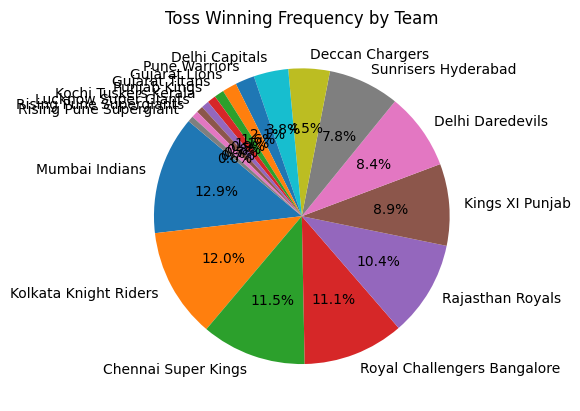

In [41]:
toss_winner = matches['TossWinner']
toss_counts = toss_winner.value_counts()
plt.pie(toss_counts, labels=toss_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Toss Winning Frequency by Team')
plt.show()

Distriution of teams on the basis of no. of season they have won

C:\Users\dapte\AppData\Local\Temp\ipykernel_12456\3071129106.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winners_count.index, y=winners_count.values, palette='viridis')


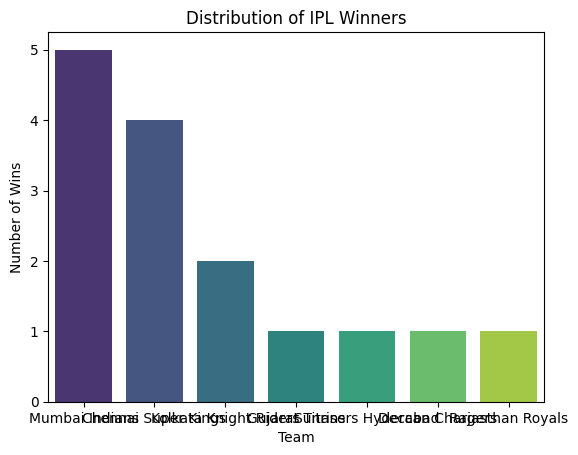

In [42]:
mask = matches['MatchNumber'] == "Final"
a = matches[mask]
a[['Season', 'WinningTeam']].sort_values('Season', ignore_index = True)

winners_count = a['WinningTeam'].value_counts()

# Plot the distribution of winners
sns.barplot(x=winners_count.index, y=winners_count.values, palette='viridis')
plt.title('Distribution of IPL Winners')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

Q 5. Top 30 players who have won the title of MOM most times

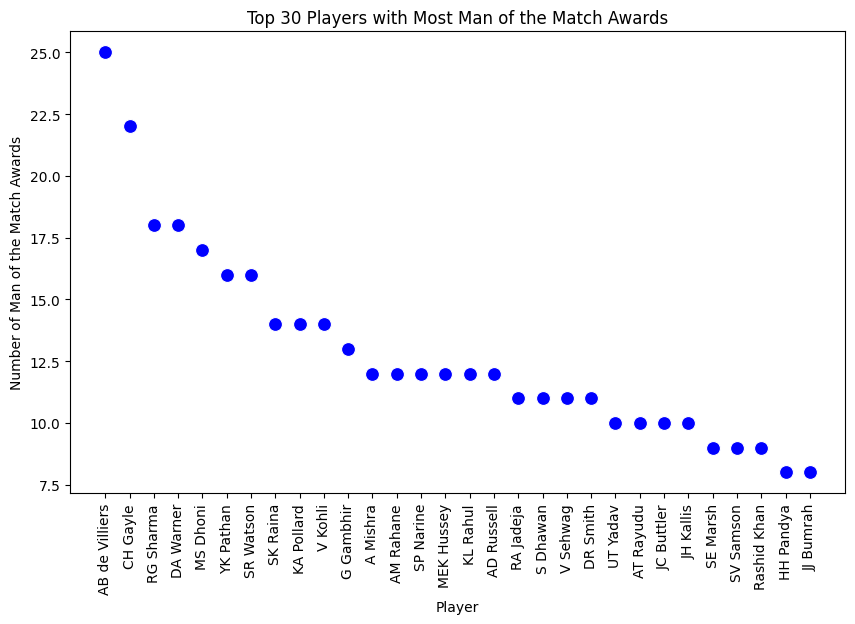

In [43]:
player_mom_count = matches['Player_of_Match'].value_counts()

# Sort the players based on the number of times they've received the award
player_mom_count_sorted = player_mom_count.sort_values(ascending=False)

# Select the top 10 players
top_30_players = player_mom_count_sorted.head(30)

# Plot the data using a Seaborn scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_30_players.index, y=top_30_players.values, s=100, color='blue')
plt.title('Top 30 Players with Most Man of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of Man of the Match Awards')
plt.xticks(rotation="vertical")
plt.show()

Q 6. Chances of wining the match if you win the toss

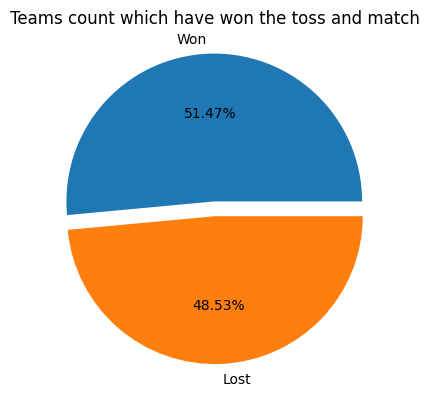

In [44]:
mask = matches['TossWinner']==matches['WinningTeam']
x= mask.value_counts()
explode=(.1,0)
labels = ['Won', 'Lost']
plt.pie(x,labels = labels,autopct = "%.2f%%", explode= explode)
plt.title("Teams count which have won the toss and match")
plt.show()

Q 7. Finding the margin of each winning team in finals

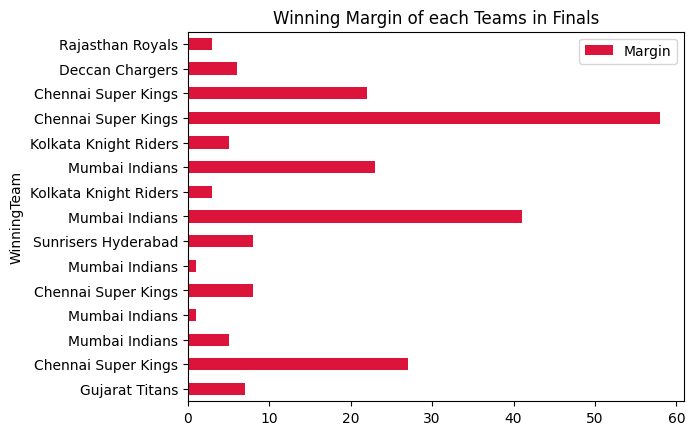

In [45]:
mask = matches['MatchNumber'] == "Final"
a = matches[mask]
a.plot(x="WinningTeam",y="Margin",kind = "barh",color = "crimson")
plt.title("Winning Margin of each Teams in Finals")
plt.show()

Which teams has played most no. of matches

C:\Users\dapte\AppData\Local\Temp\ipykernel_12456\3188574295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=d.index,y=d.values,palette='viridis')


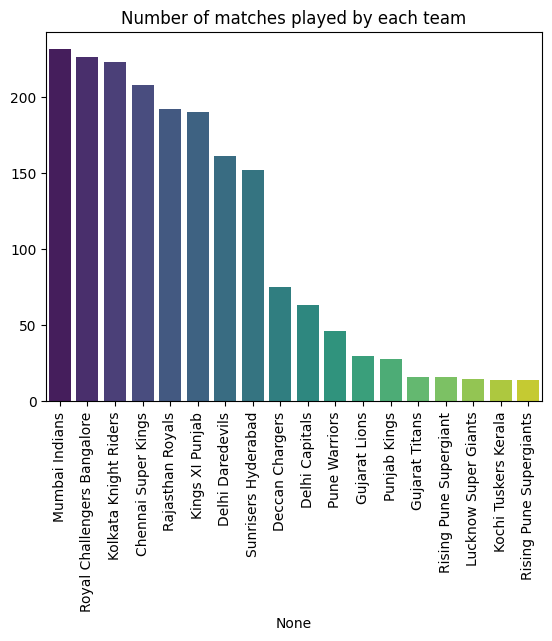

In [46]:
d = (matches['Team1'].value_counts()+matches['Team2'].value_counts()).sort_values(ascending = False)
sns.barplot(x=d.index,y=d.values,palette='viridis')
plt.xticks(rotation='vertical')
plt.title("Number of matches played by each team")
plt.show()